In [1]:
#Dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from PIL import Image
from keras.utils import img_to_array
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
# Conectamos a Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Declaramos función para leer conjuntos de imagenes
def get_data(data):
  lista = []
  for file in os.listdir(data):
    image = Image.open(data + file).convert("L") # Leemos cada imagen
    image = image.resize((150, 150)) # Reescalamos la imagen a 150x150 pixeles
    image = img_to_array(image) # Se convierte la imagen a array
    lista.append(image) # Anadimos a la lista
  return lista

In [4]:
# Cargamos los conjuntos
train_normal   = get_data('/content/drive/My Drive/chest_xray/train/NORMAL/')
train_neumonia = get_data('/content/drive/My Drive/chest_xray/train/PNEUMONIA/')
test_normal    = get_data('/content/drive/My Drive/chest_xray/test/NORMAL/')
test_neumonia  = get_data('/content/drive/My Drive/chest_xray/test/PNEUMONIA/')
val_normal     = get_data('/content/drive/My Drive/chest_xray/val/NORMAL/')
val_neumonia   = get_data('/content/drive/My Drive/chest_xray/val/PNEUMONIA/')

In [5]:
# Dimensionamos cada conjunto para asegurarnos de que tengan tamaños iguales
muestra = np.random.randint(1000) # Fijamos un numero aleatorio para las muestras a visualizar para asegurarnos que esten correctas
print(f'Las dimensiones del conjunto de entrenamiento normal son :       {train_normal[muestra].shape}')
print(f'Las dimensiones del conjunto de entrenamiento con neumonia son : {train_neumonia[muestra].shape}')
muestra2 = np.random.randint(200) # Fijamos un numero aleatorio para las muestras a visualizar para asegurarnos que esten correctas
print(f'Las dimensiones del conjunto de prueba normal son :              {test_normal[muestra2].shape}')
print(f'Las dimensiones del conjunto de prueba con neumonia son :        {test_neumonia[muestra2].shape}')
print(f'Las dimensiones del conjunto de validación normal son :          {val_normal[0].shape}')
print(f'Las dimensiones del conjunto de validación con neumonia son :    {val_neumonia[0].shape}')

Las dimensiones del conjunto de entrenamiento normal son :       (150, 150, 1)
Las dimensiones del conjunto de entrenamiento con neumonia son : (150, 150, 1)
Las dimensiones del conjunto de prueba normal son :              (150, 150, 1)
Las dimensiones del conjunto de prueba con neumonia son :        (150, 150, 1)
Las dimensiones del conjunto de validación normal son :          (150, 150, 1)
Las dimensiones del conjunto de validación con neumonia son :    (150, 150, 1)


In [6]:
# Obtenemos el balance de los conjuntos
print(f'\nEl conjunto de entranamiento "normal" ahora tiene {len(train_normal)} imagenes.')
print(f'El conjunto de entranamiento "neumonia" ahora tiene {len(train_neumonia)} imagenes.')
print(f'\nEl conjunto de pueba "normal" ahora tiene {len(test_normal)} imagenes.')
print(f'El conjunto de pueba "neumonia" ahora tiene {len(test_neumonia)} imagenes.')
print(f'\nEl conjunto de validacion "normal" ahora tiene {len(val_normal)} imagenes.')
print(f'El conjunto de validacion "neumonia" ahora tiene {len(val_neumonia)} imagenes.')

print('''\nLa muestra tiene un imbalance. Para resolverlo limitaremos el número 
de observaciones de "neumonia" para evitar un sesgo en el modelo''') # La muestra tiene un imbalance...

# Elaboramos un muestreo aleatorio para igualar el tamaño de 'neumonia' al de 'normal'
train_neumonia = resample(train_neumonia, n_samples=len(train_normal), random_state=10)
test_neumonia = resample(train_neumonia, n_samples=len(test_normal), random_state=10)

print(f'\nEl conjunto de entranamiento "normal" ahora tiene {len(train_normal)} imagenes.')
print(f'El conjunto de entranamiento "neumonia" ahora tiene {len(train_neumonia)} imagenes.')
print(f'\nEl conjunto de pueba "normal" ahora tiene {len(test_normal)} imagenes.')
print(f'El conjunto de pueba "neumonia" ahora tiene {len(test_neumonia)} imagenes.')
print(f'\nEl conjunto de validacion "normal" ahora tiene {len(val_normal)} imagenes.')
print(f'El conjunto de validacion "neumonia" ahora tiene {len(val_neumonia)} imagenes.')


El conjunto de entranamiento "normal" ahora tiene 1341 imagenes.
El conjunto de entranamiento "neumonia" ahora tiene 3881 imagenes.

El conjunto de pueba "normal" ahora tiene 234 imagenes.
El conjunto de pueba "neumonia" ahora tiene 390 imagenes.

El conjunto de validacion "normal" ahora tiene 8 imagenes.
El conjunto de validacion "neumonia" ahora tiene 8 imagenes.

La muestra tiene un imbalance. Para resolverlo limitaremos el número 
de observaciones de "neumonia" para evitar un sesgo en el modelo

El conjunto de entranamiento "normal" ahora tiene 1341 imagenes.
El conjunto de entranamiento "neumonia" ahora tiene 1341 imagenes.

El conjunto de pueba "normal" ahora tiene 234 imagenes.
El conjunto de pueba "neumonia" ahora tiene 234 imagenes.

El conjunto de validacion "normal" ahora tiene 8 imagenes.
El conjunto de validacion "neumonia" ahora tiene 8 imagenes.


In [7]:
# Unimos las listas balanceadas
X_train = np.concatenate((train_normal, train_neumonia), axis=0)
X_test = np.concatenate((test_normal, test_neumonia), axis=0)
X_val = np.concatenate((val_normal, val_neumonia), axis=0)

# Preparamos nuestras variables objetivo
y_train = np.concatenate((np.zeros(len(train_normal)), np.ones(len(train_neumonia))), axis=0)
y_test = np.concatenate((np.zeros(len(test_normal)), np.ones(len(test_neumonia))), axis=0)
y_val = np.concatenate((np.zeros(len(val_normal)), np.ones(len(val_neumonia))), axis=0)

# Obtenemos el numero total de observaciones por conjunto
obser_train = len(X_train)
obser_test = len(X_test)
obser_val = len(X_val)

print(f'El conjunto de entrenamiento ahora tiene {obser_train} imagenes.')
print(f'El conjunto de pueba ahora tiene {obser_test} imagenes.')
print(f'El conjunto de validacion ahora tiene {obser_val} imagenes.')

El conjunto de entrenamiento ahora tiene 2682 imagenes.
El conjunto de pueba ahora tiene 468 imagenes.
El conjunto de validacion ahora tiene 16 imagenes.


In [8]:
# Normalizamos los conjuntos
X_train = X_train / 255.0 
X_test = X_test / 255.0 
X_val = X_val / 255.0 

# Configuración de parámetros para el preprocesamiento de imágenes
batch_size = 32
image_shape = X_train[0].shape
epochs = 10

# Construir el modelo de red neuronal convolucional
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=image_shape),
    MaxPool2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(1356, (5, 5), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 1356)      4340556   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 1356)     0

In [9]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/10
84/84 [==============================] - 30s 170ms/step - loss: 0.8499 - accuracy: 0.6435 - val_loss: 0.4265 - val_accuracy: 0.7500
Epoch 2/10
84/84 [==============================] - 9s 106ms/step - loss: 0.2192 - accuracy: 0.9165 - val_loss: 0.3300 - val_accuracy: 0.8750
Epoch 3/10
84/84 [==============================] - 9s 108ms/step - loss: 0.1250 - accuracy: 0.9560 - val_loss: 0.3066 - val_accuracy: 0.9375
Epoch 4/10
84/84 [==============================] - 9s 108ms/step - loss: 0.1147 - accuracy: 0.9571 - val_loss: 0.3304 - val_accuracy: 0.8125
Epoch 5/10
84/84 [==============================] - 9s 107ms/step - loss: 0.1001 - accuracy: 0.9616 - val_loss: 0.1678 - val_accuracy: 0.9375
Epoch 6/10
84/84 [==============================] - 9s 109ms/step - loss: 0.0960 - accuracy: 0.9638 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 7/10
84/84 [==============================] - 9s 110ms/step - loss: 0.0756 - accuracy: 0.9739 - val_loss: 0.1882 - val_accuracy: 0.9375
Epoch

In [10]:
# Evaluamos del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 2s 115ms/step - loss: 1.1440 - accuracy: 0.7521
Test Loss: 1.1439883708953857
Test Accuracy: 0.752136766910553


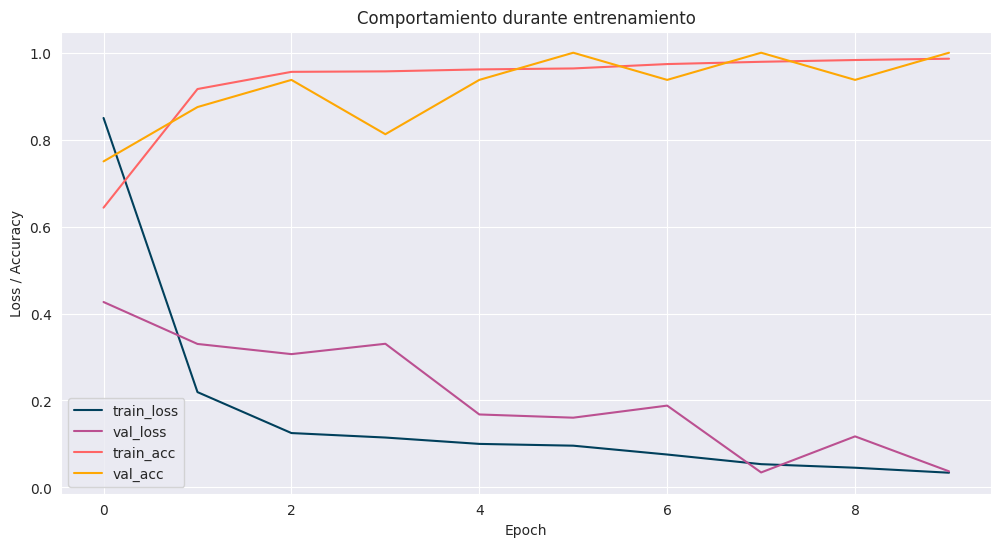

In [11]:
# Graficamos loss y accuracy durante el entrenamiento y la validación
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss', color='#01405C')
plt.plot(history.history['val_loss'], label='val_loss', color='#BB5091')
plt.plot(history.history['accuracy'], label='train_acc', color='#FF6565')
plt.plot(history.history['val_accuracy'], label='val_acc', color='#FEA703')
plt.title('Comportamiento durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [12]:
# Guardamos el modelo
model.save('pneumonia_trained_fitted.h5')

In [14]:
# Cargamos el modelo guardado
#model = load_model('pneumonia_trained.h5')

################################ Imagen Normal ################################
# Leemos la imagen en balance de grises
image1 = Image.open('01.jpeg').convert("L")

# Preparamos la imagen
image1 = image1.resize((150, 150))  # Ajustar al tamaño esperado por el modelo
image1 = img_to_array(image1)  # Convertir la imagen a array
image1 = image1 / 255.0  # Normalizar la imagen
image1 = np.expand_dims(image1, axis=0)  # Agregar una dimensión adicional

# Obtenemos la predicción del modelo
prediccion_img_normal = model.predict(image1)
probabilidad = prediccion_img_normal[0][0] * 100
prediccion_img_normal = np.round(prediccion_img_normal).item()
                                                                                    
# Mostramos la predicción (0 para imagen normal, 1 para imagen con neumonia)
print('\nEn esta consulta se cargará una imagen normal')
diagnóstico = 'normal' if prediccion_img_normal == 0 else 'neumonía'
print(f'El diagnóstico es {diagnóstico}\n')
print(f'El porsentaje de efectividad es: {probabilidad}\n')


############################### Imagen Neumonia ################################
# Leemos la imagen en balance de grises
image2 = Image.open('02.jpeg').convert("L")

# Preparamos la imagen
image2 = image2.resize((150, 150))  # Ajustar al tamaño esperado por el modelo
image2 = img_to_array(image2)  # Convertir la imagen a array
image2 = image2 / 255.0  # Normalizar la imagen
image2 = np.expand_dims(image2, axis=0)  # Agregar una dimensión adicional

# Obtenemos la predicción del modelo
prediccion_img_neu = model.predict(image2)
probabilidad = prediccion_img_neu[0][0] * 100
prediccion_img_neu = np.round(prediccion_img_neu).item()

# Mostramos la predicción (0 para imagen normal, 1 para imagen con neumonia)
print('\nEn esta consulta se cargará una imagen con neumonía')
diagnóstico = 'normal' if prediccion_img_neu == 0 else 'neumonía'
print(f'El diagnóstico es {diagnóstico}')
print(f'El porsentaje de efectividad es: {probabilidad}\n')

1/1 [==============================] - 0s 346ms/step

En esta consulta se cargará una imagen normal
El diagnóstico es normal

El porsentaje de efectividad es: 2.6604410260915756

1/1 [==============================] - 0s 28ms/step

En esta consulta se cargará una imagen con neumonía
El diagnóstico es neumonía
El porsentaje de efectividad es: 99.19924736022949

